# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

conx, version 3.4.0
Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

In [6]:
net

<IPython.core.display.Javascript object>

<Network name='Autoencoder' (compiled)>

In [7]:
patterns = [onehot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1, 0, 0, 0, 0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

In [10]:
net

<IPython.core.display.Javascript object>

<Network name='Autoencoder' (compiled)>

In [11]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [12]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : [(5,)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : [(5,)]
   range  : (0.0, 1.0)


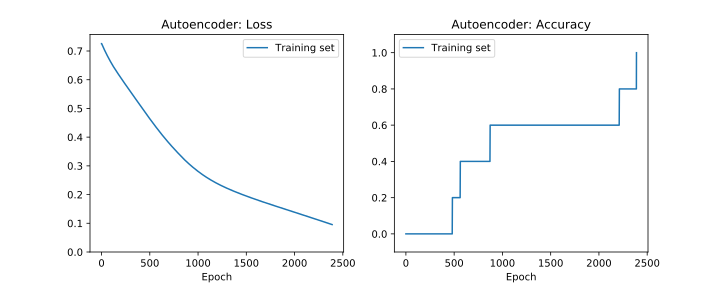

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 2389 |   0.09550 |   1.00000 


In [14]:
net.reset()
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4, plot=True)

In [15]:
net.propagate(net.dataset.inputs[0])

[0.8744319677352905,
 0.002665942534804344,
 0.043912623077631,
 4.047724360134453e-06,
 0.005730808712542057]

In [16]:
net.test(tolerance=0.4)

Testing train dataset with tolerance 0.4...
Total count: 1
      correct: 1
      incorrect: 0
Total percentage correct: 1.0


In [17]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [18]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=4), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 235" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Autoencoder</text><rect x="74.0" y="29" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_output_7" class="Autoencoder_output" x="75.0" y="30" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAP79/QAAfOnp/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABQABAAAICAADABAAAEBAADs="><title>Layer: output (output)\n shape = (5,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="52.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="99" x2="175.0" y2="72" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden to output\n output/kernel has shape (5, 5)\n output/bias has shape (5,)</title></line><rect x="74.0" y="99" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_hidden_8" class="Autoencoder_hidden" x="75.0" y="100" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAP/9/QAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

## MNIST Autoencoding

In [19]:
from conx import *

In [20]:
net = Network("MNIST-Autoencoder")

In [21]:
net.add(ImageLayer("input", (28,28), 1))
net.add(Conv2DLayer("conv", 3, (5,5), activation="relu"))
net.add(MaxPool2DLayer("pool", pool_size=(2,2)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28,28,1), activation="sigmoid"))

In [22]:
net.connect()
net.compile(error="mse", optimizer="adam")
net

<IPython.core.display.Javascript object>

<Network name='MNIST-Autoencoder' (compiled)>

In [23]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : [(28, 28, 1)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : [(784,)]
   range  : (0.0, 1.0)


In [24]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('', 'input', 'conv', 'pool'), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=69999), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'MNIST-Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 1055" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">MNIST-Autoencoder</text><rect x="74.0" y="29" width="202" height="202" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_output_7" class="MNIST-Autoencoder_output" x="75.0" y="30" height="200" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhHAAcAIcAAAMD/BMT/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAHAAcAEAI/wABCBxIsCDBAAAABADAEEAAABAjQgwAoCKAAAACANjIsSOAAABCigwAoGTJAABSBgDAsqXLlzBjypzZMgCAmzgBBADAs6fPn0CDCvUZAIDRo0iTJg0AoKnTp1CjNg0AoKrVq1izat3K1WoAAGDDgg0AoKzZs2jNBgDAtq3bt3DjymUbAIDdu3jz6r0bAIDfvwEACB5MuLDgAAASK17MuLHjx5AjNw4AoLLlywACAAgAoLPnzwEAiBYdAIDp06YDAFjNurXrAABiywYQAIDt2wEA6N7Nu/fuAAEACB9OvLjx4QEAKF/OPACA5wEASA8AoLr169YDANjOnXsAAODDizkfT768+fPo06MPAKC9+/fw3QcAQL8+gAAA8uvfz79/foABAAwkWNDgwAAAFC5k2NDhwgAAJE6kGBAAOw=="><title>Layer: output (output)\n shape = (28, 28, 1)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="132.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="259" x2="175.0" y2="232" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden3 to output\n output/kernel has shape (25, 784)\n output/bias has shape (784,)</title></line><rect x="74.0" y="259" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_hidden3_8" class="MNIST-Autoencoder_hidden

Feature 0
Feature 1
Feature 2

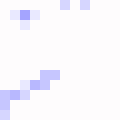
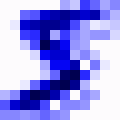
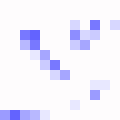

In [25]:
net.propagate_to_features("pool", net.dataset.inputs[0], cols=1, scale=10)

In [28]:
image = net.dataset.inputs[0]
output = net.propagate_to_image("output", image)
output.size

(28, 28)

In [29]:
net.propagate_to("hidden3", image)

[0.36987775564193726,
 0.5273115634918213,
 0.043583206832408905,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1749943196773529,
 0.0,
 0.0,
 0.36818239092826843,
 0.5065754652023315,
 0.5271006226539612,
 0.0,
 0.0,
 0.0,
 0.2511788308620453,
 0.0,
 0.5432827472686768,
 0.0,
 0.270825058221817,
 0.0,
 0.45302289724349976]

In [30]:
net.dataset.slice(10)

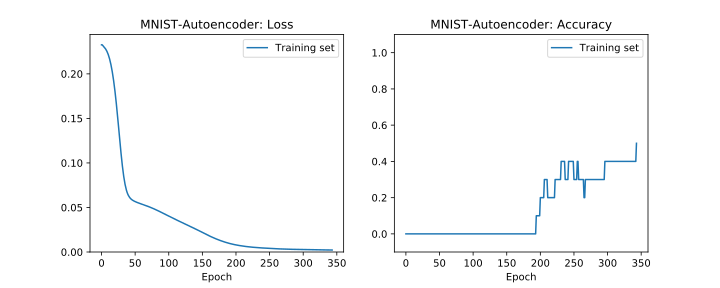

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  343 |   0.00222 |   0.50000 


In [31]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4, plot=True)

In [32]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [34]:
net.test(show_inputs=False, show_outputs=False, show=True)

Testing train dataset with tolerance 0.4000...
# | result
---------------------------------------
0 | X
Total count: 1
      correct: 0
      incorrect: 1
Total percentage correct: 0.0
